# TECH VENDOR PROFILER

---
#Preparation

## Installing packages

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

     |████████████████████████████████| 911kB 2.6MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.

## Importing libraries and modules

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import os
import json
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import random
import re
import warnings
import math
warnings.filterwarnings("ignore")

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

## Global functions

In [ ]:
#Function to describe all statistics feature of the dataset

def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)  
 #Function that takes and show a screenshot of the webpage where the ghost driver is on 

def webpage_shot():
    wd.save_screenshot('screenshot.png')
    %pylab inline
    img=mpimg.imread('/content/screenshot.png')
    imgplot = plt.imshow(img)
    print(wd.title)
    return plt.show()

## Set global constants

In [ ]:
idvendor1 = 1
idvendor2 = 2
vendor1 = "MediaWorld"
vendor2 = "Unieuro"
path = '/content/drive/My Drive/tech_vendor_datasets' 
linkMediaWorld = "https://www.mediaworld.it/catalogo/telefonia/smartphone-e-cellulari/smartphone"
linkUnieuro = "https://www.unieuro.it/online/Telefonia-e-Smartphone/Smartphone-e-Cellulari/Smartphone"
linkUnieuroIphone = "https://www.unieuro.it/online/Telefonia-e-Smartphone/Smartphone-e-Cellulari/iPhone"
scrWidth = 1920
scrHeight = 1080
delay = 10

---
# Extraction - MediaWorld scraping
![testo alternativo](https://drive.google.com/uc?export=view&id=17u-beTePLFrZ6PiKplA1kmmz2lUVPU1c)

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.set_window_size(scrWidth, scrHeight)
wd.get(linkMediaWorld)
time.sleep(delay)
list_mediaworld_smartphone = wd.find_elements_by_css_selector("div.main-content.is-catalog-page > div.search-product-list.js-comp.active > div.search-product-list-content.display-mode-list.active > article")
print(len(list_mediaworld_smartphone))

24


24 products per page

Populating the interactive namespace from numpy and matplotlib
Migliori Smartphone Offerte e Prezzi | Mediaworld.it


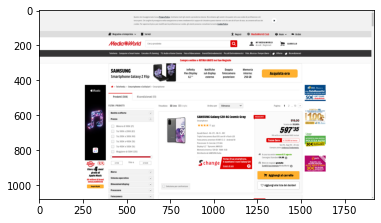

In [ ]:
webpage_shot()

Function that retrieves all the products link of the products along the pages. 
I set original price equal to the current price if the product is not discounted

In [ ]:
def get_product_info_MediaWorld(s):

  url = ""
  product_name = ""
  product_category = ""
  original_price = ""
  price = ""
  tms_loading = dt.datetime.now()

  try:
      url = s.find_elements_by_css_selector("div.col-2 h3.product-name a")[0].get_attribute("href")
      product_name = s.find_elements_by_css_selector("div.col-2 h3.product-name a")[0].text
      product_category = s.find_elements_by_css_selector("div.col-2 p.product-category")[0].text
      if (len(s.find_elements_by_css_selector("div.col-3 span.full-price.mw-price.strikeout.enhanced")) == 1):
             original_price = s.find_elements_by_css_selector("div.col-3 span.full-price.mw-price.strikeout.enhanced")[0].text.replace(',','.')
      else:
             original_price = price = s.find_elements_by_css_selector("div.price-container span")[0].text.replace(',','.')        
      price = s.find_elements_by_css_selector("div.price-container span")[0].text.replace(',','.')   
  except:
    pass
  return {'tms_loading': tms_loading,
          'id_vendor': idvendor1,
          'vendor': vendor1,
          'url': url,
          'product_name': product_name,
          'product_category': product_category,
          'original_price': original_price,
          'price': price}

Find the total number of pages to scrape

In [ ]:
count_products = wd.find_elements_by_css_selector("li.active")[0].text
total_count_products = re.sub('(\)|\(|Prodotti )','',count_products)
products_per_page = wd.find_elements_by_css_selector("span.pagination.top > span.pages")[0].get_attribute("data-pagination-count")
total_pages_mediaworld = math.ceil(int(total_count_products)/int(products_per_page))
print(total_pages_mediaworld)

13


Collecting all the links related to every singles product. The link will be used to access to its proper page and get additional data

In [ ]:
all_mediaworld_phones = []

for num in tqdm(range(1,total_pages_mediaworld + 1)):
  wd.get(f"https://www.mediaworld.it/catalogo/telefonia/smartphone-e-cellulari/smartphone?pageNumber={num}")
  time.sleep(delay)
  list_mediaworld_smartphone = wd.find_elements_by_css_selector("div.main-content.is-catalog-page > div.search-product-list.js-comp.active > div.search-product-list-content.display-mode-list.active > article")
  for s in list_mediaworld_smartphone:
    all_mediaworld_phones.append(get_product_info_MediaWorld(s))

print('Total collected products: ' + str(len(all_mediaworld_phones)) + '/' + str(total_count_products))


Total collected products: 304/304


Setting a dataframe to collect the products which have just been scraped

In [ ]:
ds_all_mediaworld_phones = pd.DataFrame(all_mediaworld_phones)
ds_all_mediaworld_phones.head()

,tms_loading,id_vendor,vendor,url,product_name,product_category,original_price,price
0,2020-08-13 12:31:34.509187,1,MediaWorld,https://www.mediaworld.it/product/p-123403/sam...,SAMSUNG Galaxy S20 4G Cosmic Gray,Smartphone,919.00,597.35
1,2020-08-13 12:31:34.618199,1,MediaWorld,https://www.mediaworld.it/product/p-129771/xia...,XIAOMI Mi Note 10 Lite 128gb Black Vodafone,Smartphone Dual SIM,399.00,279.30
2,2020-08-13 12:31:34.751332,1,MediaWorld,https://www.mediaworld.it/product/p-112081/app...,APPLE iPhone 11 64GB Bianco,Smartphone,839.00,794.00
3,2020-08-13 12:31:34.856095,1,MediaWorld,https://www.mediaworld.it/product/p-112133/app...,APPLE iPhone 11 Pro 256GB Verde Notte,Smartphone,1359.00,1155.15
4,2020-08-13 12:31:34.967637,1,MediaWorld,https://www.mediaworld.it/product/p-123401/sam...,SAMSUNG Galaxy S20 4G Cloud Blue,Smartphone,919.00,597.35


In [ ]:
ds_all_mediaworld_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tms_loading       304 non-null    datetime64[ns]
 1   id_vendor         304 non-null    int64         
 2   vendor            304 non-null    object        
 3   url               304 non-null    object        
 4   product_name      304 non-null    object        
 5   product_category  304 non-null    object        
 6   original_price    304 non-null    object        
 7   price             304 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 19.1+ KB


In [ ]:
ds_all_mediaworld_phones.duplicated(['url']).sum()

8

In [ ]:
ds_all_mediaworld_phones = ds_all_mediaworld_phones.drop_duplicates(subset=['url'])
ds_all_mediaworld_phones.reset_index(drop = True)

,tms_loading,id_vendor,vendor,url,product_name,product_category,original_price,price
0,2020-08-13 12:31:34.509187,1,MediaWorld,https://www.mediaworld.it/product/p-123403/sam...,SAMSUNG Galaxy S20 4G Cosmic Gray,Smartphone,919.00,597.35
1,2020-08-13 12:31:34.618199,1,MediaWorld,https://www.mediaworld.it/product/p-129771/xia...,XIAOMI Mi Note 10 Lite 128gb Black Vodafone,Smartphone Dual SIM,399.00,279.30
2,2020-08-13 12:31:34.751332,1,MediaWorld,https://www.mediaworld.it/product/p-112081/app...,APPLE iPhone 11 64GB Bianco,Smartphone,839.00,794.00
3,2020-08-13 12:31:34.856095,1,MediaWorld,https://www.mediaworld.it/product/p-112133/app...,APPLE iPhone 11 Pro 256GB Verde Notte,Smartphone,1359.00,1155.15
4,2020-08-13 12:31:34.967637,1,MediaWorld,https://www.mediaworld.it/product/p-123401/sam...,SAMSUNG Galaxy S20 4G Cloud Blue,Smartphone,919.00,597.35
...,...,...,...,...,...,...,...,...
291,2020-08-13 12:34:45.567256,1,MediaWorld,https://www.mediaworld.it/product/p-117769/mot...,MOTOROLA E6 Plus 64GB Polished Graphite,Smartphone Dual SIM,169.99,129.99
292,2020-08-13 12:34:45.730879,1,MediaWorld,https://www.mediaworld.it/product/p-127343/xia...,XIAOMI Mi 10 8+256 Coral Green,Smartphone,899.00,899.00
293,2020-08-13 12:34:45.838830,1,MediaWorld,https://www.mediaworld.it/product/p-128769/hua...,HUAWEI P40 Lite E Midnight Black,Smartphone Dual SIM,199.00,158.99
294,2020-08-13 12:34:46.064667,1,MediaWorld,https://www.mediaworld.it/product/p-129520/xia...,XIAOMI Mi 10 Lite 5G 6+128 Aurora Blue,Smartphone Dual SIM,399.00,369.00


This function get all the specs for every product pass as parameters

In [ ]:
def get_prod_spec_MediaWorld(prod,date_loading,price,original_price,brand):
  os = ""
  ram = ""
  memory = ""
  brand
  model = ""
  sim = ""
  color = ""
  display_type = ""
  display_size = ""
  carrier = ""
  battery_capacity = ""
  weight = ""
  gps = ""
  a_gps = ""
  dimension = ""
  height = ""
  width = ""
  length = ""
  tms_loading = dt.datetime.now()

  check = True
  i = 0


  for c in prod:
      try:
        while True:
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Sistema operativo:"):
           os = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip() 
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "RAM:"):
           ram = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip() 
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Modello:"):
           model = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Capacità interna:"):
           memory = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip() 
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Numero Sim:"):
           sim = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()     
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Colore:"):
           color = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip() 
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Tipologia schermo:"):
           display_type = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Dimensioni display ('):"):
           display_size = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Capacità batteria:"):
           battery_capacity = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()    
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Operatore:"):
           carrier = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()    
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Peso (kg):"):
           weight = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()     
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "GPS:"):
           gps = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "A-GPS:"):
           a_gps = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
          if(c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__key")[i].get_attribute("textContent").strip() == "Dimensioni:"):
           dimension = c.find_elements_by_css_selector(".Tech-row__inner.Tech-row__inner__value")[i].get_attribute("textContent").strip()  
           width = dimension.split('x')[0]
           height = dimension.split('x')[1]
           length = dimension.split('x')[2]

          i += 1
      except:
        check = False
        pass
  return {'tms_loading': tms_loading,
          'date_loading': date_loading,
          'id_vendor': idvendor1,
          'vendor': vendor1, 
          'os': os,
          'brand': brand,
          'model': model,
          'price': price,
          'original_price': original_price,
          'ram': ram,
          'memory': memory,
          'sim': sim,
          'gps': gps,
          'a_gps': a_gps,
          'color': color,
          'display_type': display_type,
          'display_size': display_size,
          'carrier': carrier,
          'battery_capacity': battery_capacity,
          'height':height,
          'width':width,
          'length':length,
          'weight': weight} 

Appending all specs retrieved in a list. To ensure a correct loading of the page we use the class WebDriverWait

In [ ]:
all_mediaworld_spec_phones = []

date_loading = dt.date.today()

for index, prd in tqdm(ds_all_mediaworld_phones.iterrows()):
    time.sleep(np.random.randint(1,delay))
    link = prd["url"]
    price = prd["price"]
    original_price = prd["original_price"]
    brand = prd["product_name"].split(' ')[0]
    try:
      wd.set_window_size(scrWidth, scrHeight)
      wd.get(link)
      try:
       WebDriverWait(wd, 10).until(
          EC.element_to_be_clickable((By.CLASS_NAME, "product-add-to-cart mw-yellow-btn btn-size-md js-add-to-cart"))
       )
      except:
        pass
      prod = wd.find_elements_by_class_name("product-content-wrapper")
      all_mediaworld_spec_phones.append(get_prod_spec_MediaWorld(prod,date_loading,price,original_price,brand))
    except Exception as e:
      print(e) 

In [ ]:
ds_spec_phones_mediaworld = pd.DataFrame(all_mediaworld_spec_phones)
ds_spec_phones_mediaworld.head()

,tms_loading,date_loading,id_vendor,vendor,os,brand,model,price,original_price,ram,memory,sim,gps,a_gps,color,display_type,display_size,carrier,battery_capacity,height,width,length,weight
0,2020-08-13 12:35:33.306301,2020-08-13,1,MediaWorld,Android,SAMSUNG,Galaxy S20 4G,597.35,919.00,8 GB,128 GB,Mono SIM,Sì,Sì,Grey,Dynamic AMOLED,"6,2",No,4000 mAh,"15,17","6,91","0,79 cm","0,163"
1,2020-08-13 12:36:02.587361,2020-08-13,1,MediaWorld,Android,XIAOMI,MI NOTE 10 LITE,279.30,399.00,6 GB,128 GB,Dual SIM,Sì,N.d,Black,AMOLED,"6,47",Vodafone,5260 mAh,"15,78","7,42","0,967 cm","0,204"
2,2020-08-13 12:36:25.157765,2020-08-13,1,MediaWorld,Ios,APPLE,iPhone 11 64GB,794.00,839.00,,64 GB,Mono SIM,Sì,Sì,White,Retina,"6,1",No,,"15,09","7,57","0,83 cm","0,194"
3,2020-08-13 12:36:54.285715,2020-08-13,1,MediaWorld,Ios,APPLE,iPhone 11 Pro 256GB,1155.15,1359.00,,256 GB,Mono SIM,Sì,Sì,Green,Oled,"5,8",No,,"14,4","7,14","0,81 cm","0,188"
4,2020-08-13 12:37:16.289591,2020-08-13,1,MediaWorld,Android,SAMSUNG,Galaxy S20 4G,597.35,919.00,8 GB,128 GB,Mono SIM,Sì,Sì,Blue,Dynamic AMOLED,"6,2",No,4000 mAh,"15,17","6,91","0,79 cm","0,163"


In [ ]:
ds_spec_phones_mediaworld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tms_loading       296 non-null    datetime64[ns]
 1   date_loading      296 non-null    object        
 2   id_vendor         296 non-null    int64         
 3   vendor            296 non-null    object        
 4   os                296 non-null    object        
 5   brand             296 non-null    object        
 6   model             296 non-null    object        
 7   price             296 non-null    object        
 8   original_price    296 non-null    object        
 9   ram               296 non-null    object        
 10  memory            296 non-null    object        
 11  sim               296 non-null    object        
 12  gps               296 non-null    object        
 13  a_gps             296 non-null    object        
 14  color             296 non-

In [ ]:
ds_all_mediaworld_phones.duplicated().sum()

0

In [ ]:
file_name = "ds_spec_phones_mediaworld_" + dt.date.today().strftime('%Y%m%d') + ".csv"
ds_spec_phones_mediaworld.to_csv(file_name,encoding="utf-8")

---
# Extraction - Unieuro scraping
![testo alternativo](https://drive.google.com/uc?export=view&id=186CaxVZq1S9MMCiiBidejVKHcgaV5c0Z)

Unieuro split the smartphone catalogue into "Iphone" and the others brand so it's necessary to scrape the site in two phases

### Other brands

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.set_window_size(scrWidth, scrHeight)
wd.get(linkUnieuro)
time.sleep(delay)
list_smartphone_unieuro = wd.find_elements_by_css_selector("div.items-container> section.hits > section.collapsed > article")
print(len(list_smartphone_unieuro))

24


Populating the interactive namespace from numpy and matplotlib
Smartphone: scopri i prezzi imbattibili di Unieuro


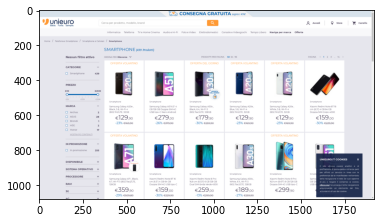

In [ ]:
webpage_shot()

Find the total number of pages to scrape

In [ ]:
total_results = wd.find_elements_by_css_selector("span.total-results")[0].text
total_products_unieuro = re.sub('(\)|\(| Prodotti)','',total_results)
total_pages_unieuro = math.ceil(int(total_products_unieuro)/len(list_smartphone_unieuro))
print(total_pages_unieuro)

19


Function that retrieves all the products link of the products along the pages. 
I set original price equal to the current price if the product is not discounted

In [ ]:
def get_product_info_Unieuro(s):
  url = ""
  product_name = ""
  product_category = ""
  original_price = ""
  price = ""
  tms_loading = dt.datetime.now()

  try:
      url = s.find_elements_by_css_selector("div.info div.product-img-container a")[0].get_attribute("href")
      product_name = s.find_elements_by_css_selector("div.info div.title a")[0].text
      product_category = s.find_elements_by_css_selector("div.info div.category")[0].text
      if(len(s.find_elements_by_css_selector("div.info span.original-price")) == 1):
            original_price = s.find_elements_by_css_selector("div.info span.original-price")[0].text.replace(',','.') 
      else:
            original_price = s.find_elements_by_css_selector("div.info div.price")[0].text.replace(',','.')         
      price = s.find_elements_by_css_selector("div.info div.price")[0].text.replace(',','.')   
  except:
    pass
  return {'tms_loading': tms_loading,
          'id_vendor': idvendor2,
          'vendor': vendor2,
          'url': url,
          'product_name': product_name,
          'product_category': product_category,
          'original_price': original_price,
          'price': price}

Collecting all the links related to every singles product. The link will be used to access to its proper page and get additional data

In [ ]:
all_unieuro_phones = []

for num in tqdm(range(0,total_pages_unieuro)):
  wd.get(f"https://www.unieuro.it/online/Telefonia-e-Smartphone/Smartphone-e-Cellulari/Smartphone?p={num}&dFR[categories.lvl3][0]=C2101")
  time.sleep(np.random.randint(1,delay))
  list_smartphone = wd.find_elements_by_css_selector("div.items-container> section.hits > section.collapsed > article")
  for s in list_smartphone:
    all_unieuro_phones.append(get_product_info_Unieuro(s))

print('Total collected products: ' + str(len(all_unieuro_phones)) + '/' + total_products_unieuro)


Total collected products: 446/446


Setting a dataframe to collect the products which have just been scraped

In [ ]:
ds_unieuro_phones = pd.DataFrame(all_unieuro_phones)
ds_unieuro_phones.head()

,tms_loading,id_vendor,vendor,url,product_name,product_category,original_price,price
0,2020-08-14 06:09:20.340302,2,Unieuro,https://www.unieuro.it/online/Smartphone/Note-...,"Xiaomi Redmi Note 8T 16 cm (6.3"") 4 GB 64 GB D...",Smartphone,€229.90,€179.90
1,2020-08-14 06:09:20.468157,2,Unieuro,https://www.unieuro.it/online/Smartphone/Galax...,"Samsung Galaxy A20e , Black, 5.8, Wi-Fi 4 (802...",Smartphone,€169.90,€139.90
2,2020-08-14 06:09:20.592269,2,Unieuro,https://www.unieuro.it/online/Smartphone/Galax...,"Samsung Galaxy A51 6.5"" 4 GB 128 GB Doppia SIM...",Smartphone,€379.90,€268.90
3,2020-08-14 06:09:20.709932,2,Unieuro,https://www.unieuro.it/online/Smartphone/Galax...,"Samsung Galaxy S10 Lite , Black, 6.7, Wi-Fi 5 ...",Smartphone,€679.00,€499.00
4,2020-08-14 06:09:20.827036,2,Unieuro,https://www.unieuro.it/online/Smartphone/P30-l...,"Huawei P30 lite 15,6 cm (6.15"") 4 GB 128 GB Du...",Smartphone,€299.90,€229.00


In [ ]:
ds_unieuro_phones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tms_loading       446 non-null    datetime64[ns]
 1   id_vendor         446 non-null    int64         
 2   vendor            446 non-null    object        
 3   url               446 non-null    object        
 4   product_name      446 non-null    object        
 5   product_category  446 non-null    object        
 6   original_price    446 non-null    object        
 7   price             446 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 28.0+ KB


In [ ]:
ds_unieuro_phones.duplicated(['url']).sum()

0

This function get all the specs for every product pass as parameters

In [ ]:
def get_prod_spec_Unieuro(prod,date_loading,price,original_price,brand,model,carrier):
  os = ""
  ram = ""
  memory = ""
  sim = ""
  color = ""
  display_type = ""
  display_size = ""
  battery_capacity = ""
  weight = ""
  gps = ""
  a_gps = ""
  height = ""
  width = ""
  length = ""
  tms_loading = dt.datetime.now()
  
  i = 0

  check = True

  try:
    while check:
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Piattaforma"):
        os = prod.find_elements_by_css_selector("span.detail")[i].text
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Capacità della RAM"):
        ram = prod.find_elements_by_css_selector("span.detail")[i].text 
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Capacità memoria interna"):
        memory = prod.find_elements_by_css_selector("span.detail")[i].text 
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Capacità della scheda SIM"):
        sim = prod.find_elements_by_css_selector("span.detail")[i].text     
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Colore del prodotto"):
        color = prod.find_elements_by_css_selector("span.detail")[i].text  
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Tipo di display"):
        display_type = prod.find_elements_by_css_selector("span.detail")[i].text   
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Dimensioni schermo"):
        display_size = prod.find_elements_by_css_selector("span.detail")[i].text   
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Capacità della batteria"):
       battery_capacity = prod.find_elements_by_css_selector("span.detail")[i].text    
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Peso"):
       weight = prod.find_elements_by_css_selector("span.detail")[i].text    
      if(prod.find_elements_by_css_selector("span.label")[i].text == "GPS"):
       gps = prod.find_elements_by_css_selector("span.detail")[i].text   
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Assistenza funzione GPS (A-GPS)"):
       a_gps = prod.find_elements_by_css_selector("span.detail")[i].text 
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Altezza"):
       height = prod.find_elements_by_css_selector("span.detail")[i].text   
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Larghezza"):
       width = prod.find_elements_by_css_selector("span.detail")[i].text   
      if(prod.find_elements_by_css_selector("span.label")[i].text == "Profondità"):
       length = prod.find_elements_by_css_selector("span.detail")[i].text   

      i += 1

  except:
     check = False
     pass
  return {'tms_loading': tms_loading,
          'date_loading': date_loading,
          'id_vendor': idvendor2,
          'vendor': vendor2, 
          'os': os,
          'brand': brand,  
          'model': model,
          'price': price,
          'original_price': original_price,       
          'ram': ram,
          'memory': memory,
          'sim': sim,
          'gps': gps,
          'a_gps': a_gps,
          'color': color,
          'display_type': display_type,
          'display_size': display_size,
          'carrier': carrier,
          'battery_capacity': battery_capacity,
          'height':height,
          'width':width,
          'length':length,
          'weight': weight} 

Appending all specs retrieved in a list. To ensure a correct loading of the page we use the class WebDriverWait

In [ ]:
all_unieuro_spec_phones = []

date_loading = dt.date.today()

for index, prd in tqdm(ds_unieuro_phones.iterrows()):
    time.sleep(np.random.randint(1,delay))
    link = prd["url"]
    price = prd["price"]
    original_price = prd["original_price"]
    product_name_ext = prd["product_name"]
    product_name_no_carrier = re.sub(('Vodafone|TIM|H3G|WindTre'),'',product_name_ext,flags = re.IGNORECASE)
    product_name_no_carrier = product_name_no_carrier.strip()
    brand = product_name_no_carrier.split(' ')[0]
    carrier = re.match(('Vodafone|TIM|H3G|WindTre'),product_name_ext,re.IGNORECASE)
    if carrier is None:
      carrier = 'No'
    else:
      carrier = carrier.group()
    product_name_no_carrier = product_name_no_carrier.strip()  
    product_name_no_carrier_no_brand = re.sub(brand,'',product_name_no_carrier,flags = re.IGNORECASE)
    product_name_no_carrier_no_brand = product_name_no_carrier_no_brand.strip()
    model_ext = re.match('(^.*?)(,|:|[0-9] cm|[0-9] GB|[0-9]")',product_name_no_carrier_no_brand,re.IGNORECASE)
    if model_ext is None:
      model = product_name_no_carrier_no_brand
    else:
      model = re.match('.*(?=\ )',model_ext.group(),re.IGNORECASE)
      if model is None:
         model = ''
      else:
         model = model.group()
    try:
      wd.set_window_size(scrWidth, scrHeight)
      wd.get(link)
      try:
       WebDriverWait(wd, 10).until(
          EC.presence_of_element_located((By.ID , "specifications"))
       )
      except:
        pass
      prod = wd.find_element_by_id("specifications")   
      all_unieuro_spec_phones.append(get_prod_spec_Unieuro(prod,date_loading,price,original_price,brand,model,carrier))
    except Exception as e:
     print(e)

In [ ]:
ds_spec_phones_unieuro = pd.DataFrame(all_unieuro_spec_phones)
ds_spec_phones_unieuro.head()

,tms_loading,date_loading,id_vendor,vendor,os,brand,model,price,original_price,ram,memory,sim,gps,a_gps,color,display_type,display_size,carrier,battery_capacity,height,width,length,weight
0,2020-08-13 15:01:23.625371,2020-08-13,2,Unieuro,Android,Xiaomi,Redmi Note 8T 16,€179.90,€229.90,4 GB,64 GB,Doppia SIM,Sì,Sì,Grigio,IPS,"6.3 """,No,4000 mAh,161.15 mm,75.4 mm,8.6 mm,199.8 g
1,2020-08-13 15:02:01.698153,2020-08-13,2,Unieuro,Android,Samsung,Galaxy A20e,€139.90,€169.90,3 GB,32 GB,Doppia SIM,Sì,Sì,Nero,PLS,"5.8 """,No,3000 mAh,147.4 mm,69.7 mm,8.4 mm,141 g
2,2020-08-13 15:02:53.076178,2020-08-13,2,Unieuro,Android,Samsung,Galaxy A51,€268.90,€379.90,4 GB,128 GB,Doppia SIM,Sì,Sì,Nero,SAMOLED,"6.5 """,No,4000 mAh,158.5 mm,73.6 mm,7.9 mm,172 g
3,2020-08-13 15:03:49.773108,2020-08-13,2,Unieuro,Android,Samsung,Galaxy S10 Lite,€499.00,€679.00,8 GB,128 GB,Doppia SIM,Sì,Sì,Nero,SAMOLED,"6.7 """,No,4500 mAh,162.5 mm,75.6 mm,8.1 mm,186 g
4,2020-08-13 15:04:42.985259,2020-08-13,2,Unieuro,Android,Huawei,P30 lite,€229.00,€299.90,4 GB,128 GB,Dual SIM ibrida,Sì,Sì,Nero,IPS,"6.15 """,No,3340 mAh,152.9 mm,72.7 mm,7.4 mm,159 g


In [ ]:
ds_spec_phones_unieuro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446 entries, 0 to 445
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tms_loading       446 non-null    datetime64[ns]
 1   date_loading      446 non-null    object        
 2   id_vendor         446 non-null    int64         
 3   vendor            446 non-null    object        
 4   os                446 non-null    object        
 5   brand             446 non-null    object        
 6   model             446 non-null    object        
 7   price             446 non-null    object        
 8   original_price    446 non-null    object        
 9   ram               446 non-null    object        
 10  memory            446 non-null    object        
 11  sim               446 non-null    object        
 12  gps               446 non-null    object        
 13  a_gps             446 non-null    object        
 14  color             446 non-

In [ ]:
file_name = "ds_spec_phones_unieuro_" + dt.date.today().strftime('%Y%m%d') + ".csv"
ds_spec_phones_unieuro.to_csv(file_name,encoding="utf-8")

### Iphone

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.set_window_size(scrWidth, scrHeight)
wd.get(linkUnieuroIphone)
time.sleep(delay)
list_iphone_unieuro = wd.find_elements_by_css_selector("div.items-container> section.hits > section.collapsed > article")
print(len(list_iphone_unieuro))

24


Populating the interactive namespace from numpy and matplotlib
Iphone Apple in promzione solo sullo store Unieuro


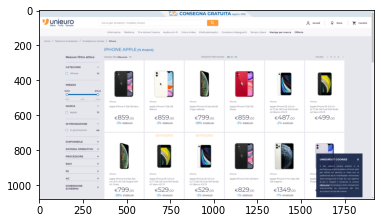

In [ ]:
webpage_shot()

In [ ]:
total_results = wd.find_elements_by_css_selector("span.total-results")[0].text
total_iphone_unieuro = re.sub('(\)|\(| Prodotti)','',total_results)
total_pages_unieuro = math.ceil(int(total_iphone_unieuro)/len(list_iphone_unieuro))
print(total_pages_unieuro)

3


In [ ]:
all_unieuro_iphones = []

for num in tqdm(range(0,total_pages_unieuro)):
  wd.get(f"https://www.unieuro.it/online/Telefonia-e-Smartphone/Smartphone-e-Cellulari/iPhone?p={num}&dFR[categories.lvl3][0]=C2102")
  time.sleep(np.random.randint(1,delay))
  list_smartphone = wd.find_elements_by_css_selector("div.items-container> section.hits > section.collapsed > article")
  for s in list_smartphone:
    all_unieuro_iphones.append(get_product_info_Unieuro(s))

print('Total collected products: ' + str(len(all_unieuro_iphones)) + '/' + total_iphone_unieuro)


Total collected products: 71/71


In [ ]:
ds_unieuro_iphones = pd.DataFrame(all_unieuro_iphones)
ds_unieuro_iphones.head()

,tms_loading,id_vendor,vendor,url,product_name,product_category,original_price,price
0,2020-08-13 20:19:16.268060,2,Unieuro,https://www.unieuro.it/online/iPhone/iPhone-11...,Apple iPhone 11 128 GB Nero,iPhone,€889.00,€799.00
1,2020-08-13 20:19:16.380464,2,Unieuro,https://www.unieuro.it/online/iPhone/iPhone-XS...,Apple iPhone XS Max 64GB Grigio siderale,iPhone,€1289.00,€749.00
2,2020-08-13 20:19:16.492195,2,Unieuro,https://www.unieuro.it/online/iPhone/iPhone-XR...,Apple iPhone XR 256GB Nero,iPhone,€899.00,€759.00
3,2020-08-13 20:19:16.600449,2,Unieuro,https://www.unieuro.it/online/iPhone/iPhone-SE...,"Apple iPhone SE 11,9 cm (4.7"") 128 GB Dual SIM...",iPhone,€549.00,€549.00
4,2020-08-13 20:19:16.721008,2,Unieuro,https://www.unieuro.it/online/iPhone/iPhone-11...,Apple iPhone 11 128 GB Bianco,iPhone,€889.00,€799.00


In [ ]:
ds_unieuro_iphones.duplicated(['url']).sum()

0

In [ ]:
all_unieuro_spec_iphones = []

date_loading = dt.date.today()

for index, project in tqdm(ds_unieuro_iphones.iterrows()):
    time.sleep(np.random.randint(1,delay))
    link = project["url"]
    price = project["price"]
    original_price = project["original_price"]
    product_name_ext = project["product_name"]
    product_name_no_carrier_no_brand = re.sub(('Vodafone|TIM|H3G|WindTre|Apple'),'',product_name_ext,flags = re.IGNORECASE)
    product_name_no_carrier_no_brand = product_name_no_carrier_no_brand.strip()
    brand = "APPLE"
    carrier = re.match(('Vodafone|TIM|H3G|WindTre'),product_name_ext,re.IGNORECASE)
    if carrier is None:
      carrier = 'No'
    else:
      carrier = carrier.group()   
    model_ext = re.match('(^.*?)(,|:|[0-9] cm|[0-9] GB|[0-9]")',product_name_no_carrier_no_brand,re.IGNORECASE)
    if model_ext is None:
      model = product_name_no_carrier_no_brand
    else:
      model = re.match('.*(?=\ )',model_ext.group(),re.IGNORECASE)
      model = model.group()
    try:
      wd.set_window_size(scrWidth, scrHeight)
      wd.get(link)
      try:
       WebDriverWait(wd, 10).until(
          EC.presence_of_element_located((By.ID , "specifications"))
       )
      except:
        pass
      prod = wd.find_element_by_id("specifications")   
      all_unieuro_spec_iphones.append(get_prod_spec_Unieuro(prod,date_loading,price,original_price,brand,model,carrier))
    except Exception as e:
      print(e) 

In [ ]:
ds_spec_iphones_unieuro = pd.DataFrame(all_unieuro_spec_iphones)
ds_spec_iphones_unieuro.head()

,tms_loading,date_loading,id_vendor,vendor,os,brand,model,price,original_price,ram,memory,sim,gps,a_gps,color,display_type,display_size,carrier,battery_capacity,height,width,length,weight
0,2020-08-13 20:19:57.496644,2020-08-13,2,Unieuro,iOS,APPLE,iPhone 11 128,€799.00,€889.00,,128 GB,Doppia SIM,Sì,Sì,Nero,LCD,"6.1 """,No,,150.9 mm,75.7 mm,8.3 mm,194 g
1,2020-08-13 20:20:39.722037,2020-08-13,2,Unieuro,iOS,APPLE,iPhone XS Max 64GB Grigio siderale,€749.00,€1289.00,,64 GB,Doppia SIM,Sì,Sì,Grigio,OLED,"6.5 """,No,,157.5 mm,77.4 mm,7.7 mm,208 g
2,2020-08-13 20:21:24.070501,2020-08-13,2,Unieuro,iOS,APPLE,iPhone XR 256GB Nero,€759.00,€899.00,,256 GB,Doppia SIM,Sì,Sì,Nero,LCD,"6.1 """,No,,150.9 mm,75.7 mm,8.3 mm,194 g
3,2020-08-13 20:22:04.673091,2020-08-13,2,Unieuro,iOS,APPLE,iPhone SE,€549.00,€549.00,,128 GB,Dual SIM ibrida,Sì,,Nero,IPS,"4.7 """,No,,138.4 mm,67.3 mm,7.3 mm,148
4,2020-08-13 20:22:42.218041,2020-08-13,2,Unieuro,iOS,APPLE,iPhone 11 128,€799.00,€889.00,,128 GB,Doppia SIM,Sì,Sì,Bianco,LCD,"6.1 """,No,,150.9 mm,75.7 mm,8.3 mm,194 g


In [ ]:
ds_spec_iphones_unieuro.duplicated().sum()

0

In [ ]:
file_name = "ds_spec_iphones_unieuro_" + dt.date.today().strftime('%Y%m%d') + ".csv"
ds_spec_iphones_unieuro.to_csv(file_name,encoding="utf-8")

Merge the resulting datasets

In [ ]:
cnt = 0
ds_all_phones_spec = pd.DataFrame()
path = '/content/drive/My Drive/tech_vendor_datasets'
fileList = os.listdir(path)

for filename in fileList:
  try:
    df = pd.read_csv(path + '/' + filename,index_col = 0)  
    ds_all_phones_spec = ds_all_phones_spec.append(df)
    cnt += 1
  except Exception as e:
    print(e)
    pass

print(str(cnt) + '/' + str(len(fileList)) + ' files in the directory ' + path + ' have been successfully merged')

9/9 files in the directory /content/drive/My Drive/tech_vendor_datasets have been successfully merged


In [ ]:
ds_all_phones_spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 0 to 445
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tms_loading       2440 non-null   object
 1   date_loading      2440 non-null   object
 2   id_vendor         2440 non-null   int64 
 3   vendor            2440 non-null   object
 4   os                2346 non-null   object
 5   brand             2440 non-null   object
 6   model             2426 non-null   object
 7   price             2440 non-null   object
 8   original_price    2440 non-null   object
 9   ram               2052 non-null   object
 10  memory            2420 non-null   object
 11  sim               2288 non-null   object
 12  gps               2406 non-null   object
 13  a_gps             2048 non-null   object
 14  color             2417 non-null   object
 15  display_type      2318 non-null   object
 16  display_size      2429 non-null   object
 17  carrier        

Export the resulting dataset

In [ ]:
ds_all_phones_spec.to_csv("ds_all_phones_spec.csv",encoding="utf-8",index = False)

---

#Transforming

1.   Data profiling with OpenRefine
2.   Data enrichment with Python



In [ ]:
df_refined = pd.read_csv("df_refined.csv",encoding="utf-8")

In [ ]:
df_refined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2429 entries, 0 to 2428
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tms_loading       2429 non-null   object 
 1   date_loading      2429 non-null   object 
 2   id_vendor         2429 non-null   int64  
 3   vendor            2429 non-null   object 
 4   os                2429 non-null   object 
 5   brand             2429 non-null   object 
 6   model             2429 non-null   object 
 7   price             2429 non-null   float64
 8   original_price    2429 non-null   float64
 9   ram               2052 non-null   object 
 10  memory            2420 non-null   float64
 11  sim               2429 non-null   object 
 12  gps               2429 non-null   object 
 13  a_gps             2429 non-null   object 
 14  color             2429 non-null   object 
 15  display_type      2429 non-null   object 
 16  display_size      2429 non-null   object 


Create the field PRICE range (1: smartphone with price < 200, 9: smartphone with price > 900

In [ ]:
conditions = [
    (df_refined['price'] <= 200),
    (df_refined['price'] > 200) & (df_refined['price'] <= 300),
    (df_refined['price'] > 300) & (df_refined['price'] <= 400),
    (df_refined['price'] > 400) & (df_refined['price'] <= 500),
    (df_refined['price'] > 500) & (df_refined['price'] <= 600), 
    (df_refined['price'] > 600) & (df_refined['price'] <= 700),
    (df_refined['price'] > 700) & (df_refined['price'] <= 800),
    (df_refined['price'] > 800) & (df_refined['price'] <= 900),  
    (df_refined['price'] > 900)
    ]
values = [1,2,3,4,5,6,7,8,9]

df_refined['price_range'] = np.select(conditions, values)

Computation of the applied discount for each product

In [ ]:
df_refined['discount'] = df_refined.original_price - df_refined.price

Create the flag discount (1 means for a discounted product, 0 is not)

In [ ]:
conds = [(df_refined['discount'] == 0),(df_refined['discount'] != 0)]
val = ['0','1']

df_refined['flag_discount'] = np.select(conds, val)

Create the field DISCOUNT_RANGE (1: smartphone with discount percentage <= 10% , 6: smartphone with discount percentage > 50%

In [ ]:
df_refined['discount_perc'] = round(df_refined.discount/df_refined.original_price,2) * 100

Discount range

In [ ]:
conditions = [
    (df_refined['discount_perc'] <= 10),
    (df_refined['discount_perc'] > 10) & (df_refined['discount_perc'] <= 20),
    (df_refined['discount_perc'] > 20) & (df_refined['discount_perc'] <= 30),
    (df_refined['discount_perc'] > 30) & (df_refined['discount_perc'] <= 40),
    (df_refined['discount_perc'] > 40) & (df_refined['discount_perc'] <= 50), 
    (df_refined['discount_perc'] > 50)
    ]
values = [1,2,3,4,5,6]

df_refined['discount_range'] = np.select(conditions, values)

Final dataset

In [ ]:
df_refined.loc[:4].style.background_gradient(subset=['price','original_price','discount'],cmap='viridis')

,tms_loading,date_loading,id_vendor,vendor,os,brand,model,price,original_price,ram,memory,sim,gps,a_gps,color,display_type,display_size,carrier,battery_capacity,height,width,length,weight,price_range,discount,flag_discount,discount_perc,discount_range
0,2020-08-07 14:25:21.555577,2020-08-07,2,Unieuro,iOS,APPLE,iPhone 11 128,799.000000,889.000000,nan,128.000000,Dual SIM,Si,Si,Black,LCD,6.1,No,nan,150.900000,75.700000,8.300000,194.000000,7,90.000000,1,10.000000,1
1,2020-08-07 14:26:02.493044,2020-08-07,2,Unieuro,iOS,APPLE,iPhone XS Max 64GB Grigio siderale,749.000000,1289.000000,nan,64.000000,Dual SIM,Si,Si,Grey,OLED,6.5,No,nan,157.500000,77.400000,7.700000,208.000000,7,540.000000,1,42.000000,5
2,2020-08-07 14:26:43.350360,2020-08-07,2,Unieuro,iOS,APPLE,iPhone XR 256GB Nero,759.000000,899.000000,nan,256.000000,Dual SIM,Si,Si,Black,LCD,6.1,No,nan,150.900000,75.700000,8.300000,194.000000,7,140.000000,1,16.000000,2
3,2020-08-07 14:27:20.581299,2020-08-07,2,Unieuro,iOS,APPLE,iPhone 11 128,799.000000,889.000000,nan,128.000000,Dual SIM,Si,Si,White,LCD,6.1,No,nan,150.900000,75.700000,8.300000,194.000000,7,90.000000,1,10.000000,1
4,2020-08-07 14:28:00.444050,2020-08-07,2,Unieuro,iOS,APPLE,iPhone SE,539.000000,549.000000,nan,128.000000,Dual SIM ibrida,Si,N.d,Black,IPS,4.7,No,nan,138.400000,67.300000,7.300000,148.000000,5,10.000000,1,2.000000,1


Dataset features explanation

| Field | Field explanation | Unit of measure
| --- | --- | --- |
| tms_loading | timestamp of the loading |
| date_loading | data of the loading |
| os | operating system |
| brand | brand of the product |
| model | model of the product |
| price | current price | €
| original_price | original price | €
| ram |	ram | GB
| memory | internal memory | GB
| sim | one sim / dual sim |
| gps | gps |
| a-gps | assisted gps |
| color | color |
| display_type | display type |
| display_size | display size | inches
| carrier | carrier |
| battery_capacity | capacity of the battery |
| height | height of the product | mm
| width	| width of the samrtphone | mm
| length | length of the product | mm
| weigth | weigth of the product | g
| price range | price range |
| discount | discounted value | €
| flag_discount | discounted / not discounted |
| discount_perc | discout percentage applied | %
| discount_range | discounted range |


---

# Loading

Export the dataset into a csv file

In [ ]:
df_refined.to_csv("ds_all_phones.csv",index = False)

---

# Data Visualization

[Go to the published POWER BI Dashboard](https://app.powerbi.com/view?r=eyJrIjoiYTM5MDgyYTItYWIxOC00MDQyLWE4NTMtZjM4ODc3ODBmZDBjIiwidCI6IjMzYWIyODYxLWZmY2YtNDVjNC04NzBjLTEyZGQ3NWY0YjI1NCIsImMiOjh9)